In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

In [2]:
from darwinian_shift import DarwinianShift, ClinvarLookup, CDFPermutationTest, ChiSquareTest

In [3]:
# Need to download the variant_summary.txt file from clinvar. 
cl = ClinvarLookup(clinvar_variant_summary_file="variant_summary.txt", 
                   assembly="GRCh37", clinsigsimple=False)

/Users/mh28/miniconda3/envs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
d_all = DarwinianShift(data="SMS-35_merged_sorted.txt",
                  source_genome='grch37', lookup=cl,
                   stats=[ChiSquareTest(bins=[-1, 0.5, 2])]
                  )

/Users/mh28/miniconda3/envs/ds/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [5]:
d_all.run_all()

/Users/mh28/PycharmProjects/darwinian_shift/darwinian_shift/lookup_classes/clinvar_lookup.py:43: RuntimeWarning: All-NaN axis encountered
  return np.nanmax(scores)
/Users/mh28/miniconda3/envs/ds/lib/python3.8/site-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/Users/mh28/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/stats/multitest.py:325: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


WARNING!
Ties/repeated values present. KS test results are not valid.
Check "repeat_proportion" column in results. If proportion is very small, KS tests may be approximately correct.


In [6]:
res_for_supp_all = d_all.results.sort_values('chi_square_glob_k3_binom_pvalue')

In [7]:
res_for_supp_all['Expected annotated pathogenic/likely pathogenic'] = res_for_supp_all.apply(
    lambda x: x['chi_square_glob_k3_expected_counts'][1], axis=1)
res_for_supp_all['Observed annotated pathogenic/likely pathogenic'] = res_for_supp_all.apply(
    lambda x: x['chi_square_glob_k3_observed_counts'][1], axis=1)

In [8]:
res_for_supp_all = res_for_supp_all[['gene', 'transcript_id', 'num_mutations', 'Expected annotated pathogenic/likely pathogenic',
                            'Observed annotated pathogenic/likely pathogenic', 'chi_square_glob_k3_binom_pvalue', 
                             'chi_square_glob_k3_binom_qvalue'
                            ]]

In [9]:
res_for_supp_all.columns = ['gene', 'transcript_id', 'num_mutations',
       'Expected annotated pathogenic/likely pathogenic',
       'Observed annotated pathogenic/likely pathogenic',
       'binom_pvalue', 'binom_qvalue']

In [10]:
res_for_supp_all.to_csv("clinvar_overlap_all_types_binomial_results.csv", index=False)

## PIK3CA figure

In [11]:
from darwinian_shift import hide_top_and_right_axes

In [12]:
pik = d_all.run_gene('PIK3CA')

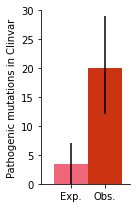

In [13]:
pik.plot_binned_counts(figsize=(2, 3), show_legend=False, colours=['#CC3311', '#EE6677'])
plt.xlim(left=0.75)
plt.ylim(top=30)
plt.title("")
plt.xticks([1.1, 1.5], ['Exp.', 'Obs.'], rotation=0)
plt.ylabel('Pathogenic mutations in Clinvar')
hide_top_and_right_axes(plt.gca())
plt.tight_layout()
plt.savefig("PIK3CA_clinvar_overlap.pdf");